In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./data/fifa23_num_clean.csv")
#df_mar = pd.read_csv("./data/fifa23_MAR.csv")
#df_mcar = pd.read_csv("./data/fifa23_MCAR.csv")
#df_mnar = pd.read_csv("./data/fifa23_MNAR.csv")
#
##DATASETS CON VALORES NULOS IMPUTADOS
#
##MEAN IMPUTATION
#df_mar_mean = pd.read_csv("./data/fifa23_MAR_MEAN.csv")
#df_mcar_mean = pd.read_csv("./data/fifa23_MCAR_MEAN.csv")
#df_mnar_mean = pd.read_csv("./data/fifa23_MNAR_MEAN.csv")
#
##MOST FREQUENT IMPUTATION
#df_mar_mf = pd.read_csv("./data/fifa23_MAR_MF.csv")
#df_mcar_mf = pd.read_csv("./data/fifa23_MCAR_MF.csv")
#df_mnar_mf = pd.read_csv("./data/fifa23_MNAR_MF.csv")
#
##KNN IMPUTATION
#df_mar_knn = pd.read_csv("./data/fifa23_MAR_KNN.csv")
#df_mcar_knn = pd.read_csv("./data/fifa23_MCAR_KNN.csv")
#df_mnar_knn = pd.read_csv("./data/fifa23_MNAR_KNN.csv")
#
##MICE IMPUTATION
#df_mar_mice = pd.read_csv("./data/fifa23_MAR_MICE.csv")
#df_mcar_mice = pd.read_csv("./data/fifa23_MCAR_MICE.csv")
#df_mnar_mice = pd.read_csv("./data/fifa23_MNAR_MICE.csv")

probs = [10, 30, 50]

imputation_methods = ["MEAN", "MODE", "KNN", "MICE"]

#mv_types = ["MCAR", "MAR", "MNAR"]

mcar_dfs = {}
mar_dfs = {}
mnar_dfs = {}

missing_mcar = {}
missing_mar = {}
missing_mnar = {}

for p in probs:
    for t, dfs in [("MCAR", missing_mcar), ("MAR", missing_mar), ("MNAR", missing_mnar)]:
        key = f'{t.lower()}_df_{p}'
        dfs[key] = pd.read_csv(f'./missing_data/fifa23_{t}_{p}.csv')

for p in probs:
    for t, dfs in [("MCAR", mcar_dfs), ("MAR", mar_dfs), ("MNAR", mnar_dfs)]:
        for i in imputation_methods:
            key = f'{t.lower()}_df_{p}_{i.lower()}_imputed'
            dfs[key] = pd.read_csv(f'./imputed_data/{key}.csv')

In [3]:
print(mcar_dfs.keys())
print(mar_dfs.keys())
print(mnar_dfs.keys())

dict_keys(['mcar_df_10_mean_imputed', 'mcar_df_10_mode_imputed', 'mcar_df_10_knn_imputed', 'mcar_df_10_mice_imputed', 'mcar_df_30_mean_imputed', 'mcar_df_30_mode_imputed', 'mcar_df_30_knn_imputed', 'mcar_df_30_mice_imputed', 'mcar_df_50_mean_imputed', 'mcar_df_50_mode_imputed', 'mcar_df_50_knn_imputed', 'mcar_df_50_mice_imputed'])
dict_keys(['mar_df_10_mean_imputed', 'mar_df_10_mode_imputed', 'mar_df_10_knn_imputed', 'mar_df_10_mice_imputed', 'mar_df_30_mean_imputed', 'mar_df_30_mode_imputed', 'mar_df_30_knn_imputed', 'mar_df_30_mice_imputed', 'mar_df_50_mean_imputed', 'mar_df_50_mode_imputed', 'mar_df_50_knn_imputed', 'mar_df_50_mice_imputed'])
dict_keys(['mnar_df_10_mean_imputed', 'mnar_df_10_mode_imputed', 'mnar_df_10_knn_imputed', 'mnar_df_10_mice_imputed', 'mnar_df_30_mean_imputed', 'mnar_df_30_mode_imputed', 'mnar_df_30_knn_imputed', 'mnar_df_30_mice_imputed', 'mnar_df_50_mean_imputed', 'mnar_df_50_mode_imputed', 'mnar_df_50_knn_imputed', 'mnar_df_50_mice_imputed'])


In [4]:
df.drop(columns={"Value(in Euro)", "Wage(in Euro)"}, inplace=True)
df

,Overall,Potential,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Preferred Foot,Weak Foot Rating,Skill Moves,...,LB Rating,CB Rating,RB Rating,GK Rating,Attacking Work Rate_High,Attacking Work Rate_Low,Attacking Work Rate_Medium,Defensive Work Rate_High,Defensive Work Rate_Low,Defensive Work Rate_Medium
0,91,91,35,169,67,2190,452,0,4,4,...,62,53,62,22,0,1,0,0,1,0
1,91,91,34,185,81,2147,455,1,4,4,...,63,58,63,21,0,0,1,0,0,1
2,91,91,33,185,81,2205,458,1,4,4,...,64,63,64,22,1,0,0,0,0,1
3,91,91,31,181,70,2303,483,1,5,4,...,78,72,78,24,1,0,0,1,0,0
4,91,95,23,182,73,2177,470,1,4,5,...,66,57,66,21,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18415,47,56,21,174,68,1287,274,1,3,2,...,40,36,40,15,0,0,1,0,0,1
18416,47,57,17,175,60,1289,267,1,3,2,...,49,49,49,15,0,0,1,0,0,1
18417,47,67,18,170,65,1333,277,1,3,2,...,46,42,46,17,1,0,0,0,0,1
18418,47,61,17,178,65,1113,226,1,3,2,...,47,49,47,15,0,0,1,0,0,1


In [ ]:
results = {}

models = [XGBRegressor(verbosity=0, missing=-1), LGBMRegressor()]

all_dfs = {
    "MCAR": (mcar_dfs, missing_mcar),
    "MAR": (mar_dfs, missing_mar),
    "MNAR": (mnar_dfs, missing_mnar)
}

for t, (dfs, missing_dfs) in all_dfs.items():
    for p in probs:
        # Original dataset with missing values
        missing_key = f'{t.lower()}_df_{p}'
        missing_df = missing_dfs[missing_key]

        for i in imputation_methods:
            # Imputed dataset
            key = f'{t.lower()}_df_{p}_{i.lower()}_imputed'
            imputed_df = dfs[key]

            datasets = [missing_df, imputed_df]
            names = [f'{t} {p}', f'{t} {p} {i} Imputation']

            for dataset, name in zip(datasets, names):
                X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=["Overall"]), dataset["Overall"], test_size=0.2)

                for model in models:
                    model.fit(X_train, y_train)

                    pred = model.predict(X_test)

                    mae = mean_absolute_error(y_test, pred)
                    mse = mean_squared_error(y_test, pred)
                    r2 = r2_score(y_test, pred)

                    results[type(model).__name__ + " - " + name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}

print(results)


In [ ]:
for key, value in results.items():
    print(key, ' : ', value)

### **NORMAL REGRESSION MODELS**

In [ ]:
imputed_results = {}

models = [LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(), DecisionTreeRegressor()]

all_dfs = {
    "MCAR": mcar_dfs,
    "MAR": mar_dfs,
    "MNAR": mnar_dfs
}

for t, dfs in all_dfs.items():
    for p in probs:
        for i in imputation_methods:
            # Imputed dataset
            key = f'{t.lower()}_df_{p}_{i.lower()}_imputed'
            imputed_df = dfs[key]

            datasets = [imputed_df]
            names = [f'{t} {p} {i} Imputation']

            for dataset, name in zip(datasets, names):
                X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=["Overall"]), dataset["Overall"], test_size=0.2)

                for model in models:
                    model.fit(X_train, y_train)

                    pred = model.predict(X_test)

                    mae = mean_absolute_error(y_test, pred)
                    mse = mean_squared_error(y_test, pred)
                    r2 = r2_score(y_test, pred)

                    imputed_results[type(model).__name__ + " - " + name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Overall"]), df["Overall"], test_size=0.2)
for model in models:
    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    imputed_results[type(model).__name__ + " - COMPLETO"] = {"MAE": mae, "MSE": mse, "R2 Score": r2}

for key, value in imputed_results.items():
    print(key, ' : ', value)


# **RESULTS VISUALIZATION**

## **MAE RESULTS**

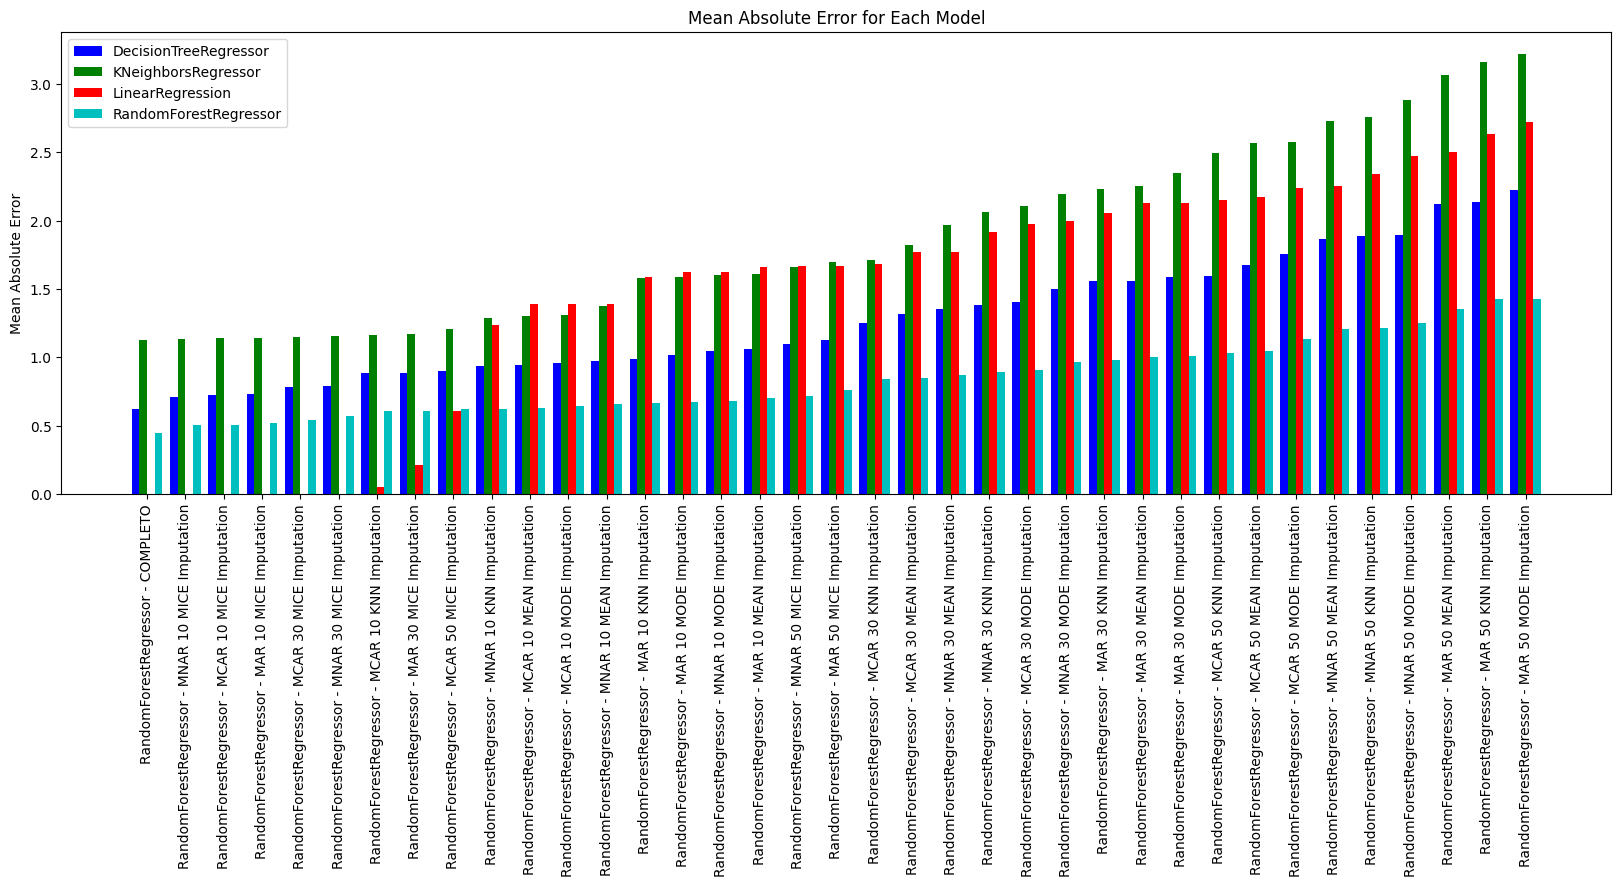

In [20]:
import matplotlib.pyplot as plt

mae_results = {k: v["MAE"] for k, v in imputed_results.items()}
mae_results = dict(sorted(mae_results.items(), key=lambda x: x[1]))

models = sorted(list(set([k.split(' - ')[0] for k in mae_results.keys()])))
colors = ['b', 'g', 'r', 'c', 'm']

fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.8 / len(models)
x = np.arange(len(mae_results) // len(models))

for idx, model in enumerate(models):
    model_results = {k: v for k, v in mae_results.items() if k.startswith(model)}
    ax.bar(x + idx * bar_width, list(model_results.values()), width=bar_width, color=colors[idx], label=model)
    x_labels = list(model_results.keys())

plt.xticks(x + (bar_width * (len(models) - 1) / 2), x_labels, rotation=90, fontsize=10)
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Mean Absolute Error for Each Model')
ax.legend()
plt.show()



## **MSE RESULTS**

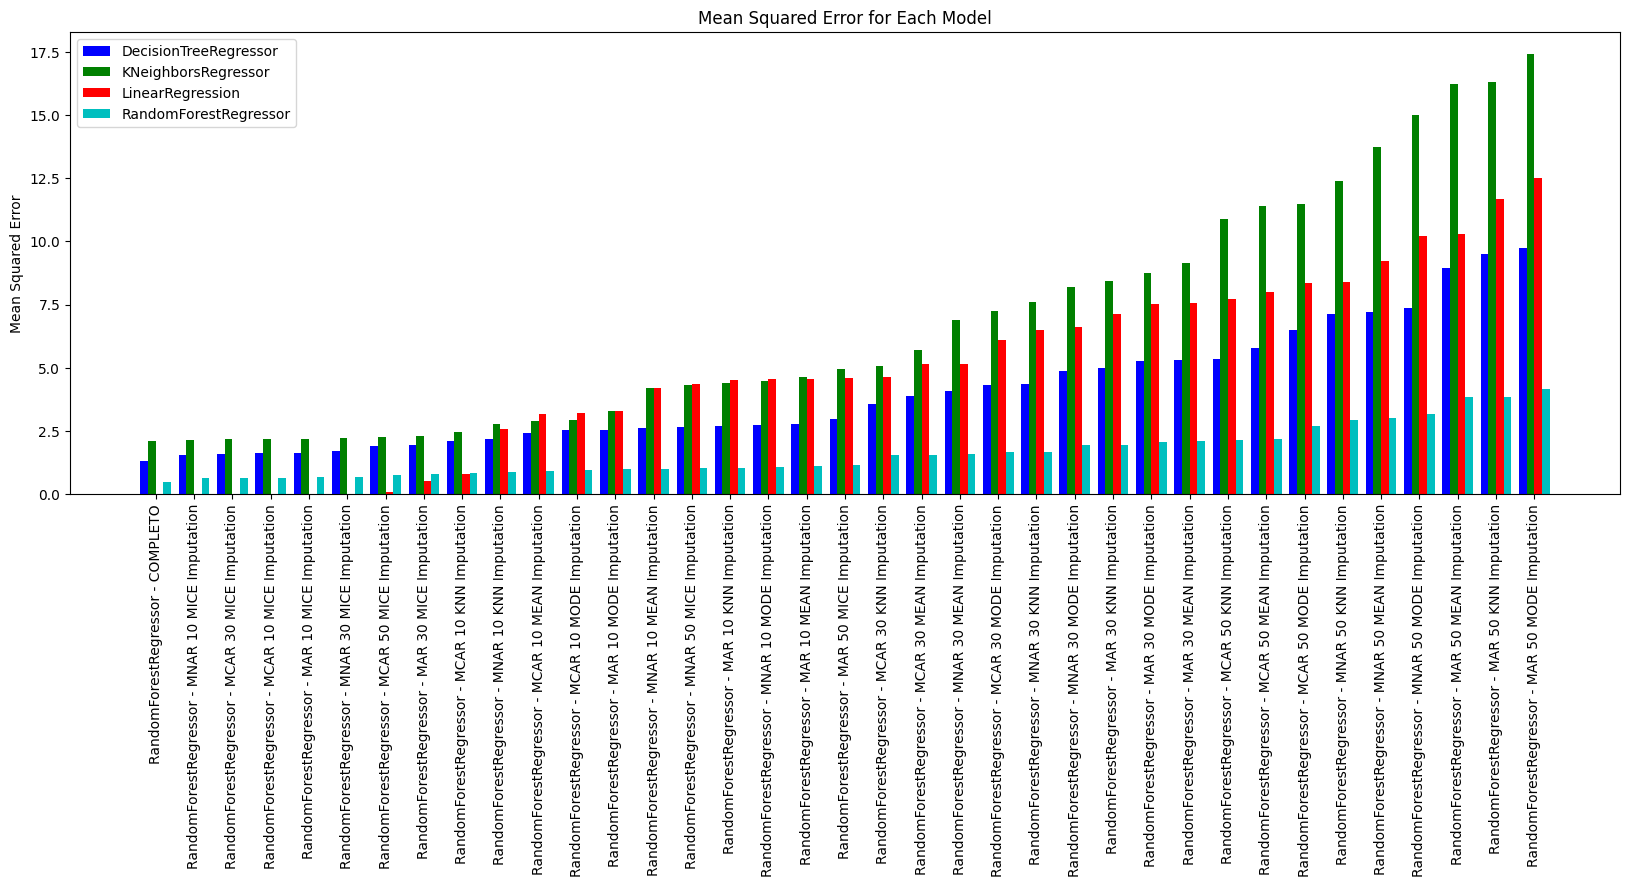

In [21]:
mse_results = {k: v["MSE"] for k, v in imputed_results.items()}
mse_results = dict(sorted(mse_results.items(), key=lambda x: x[1]))

models = sorted(list(set([k.split(' - ')[0] for k in mse_results.keys()])))
colors = ['b', 'g', 'r', 'c', 'm']

fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.8 / len(models)
x = np.arange(len(mse_results) // len(models))

for idx, model in enumerate(models):
    model_results = {k: v for k, v in mse_results.items() if k.startswith(model)}
    ax.bar(x + idx * bar_width, list(model_results.values()), width=bar_width, color=colors[idx], label=model)
    x_labels = list(model_results.keys())

plt.xticks(x + (bar_width * (len(models) - 1) / 2), x_labels, rotation=90, fontsize=10)
ax.set_ylabel('Mean Squared Error')
ax.set_title('Mean Squared Error for Each Model')
ax.legend()
plt.show()



## **R2 SOCRE RESULTS**

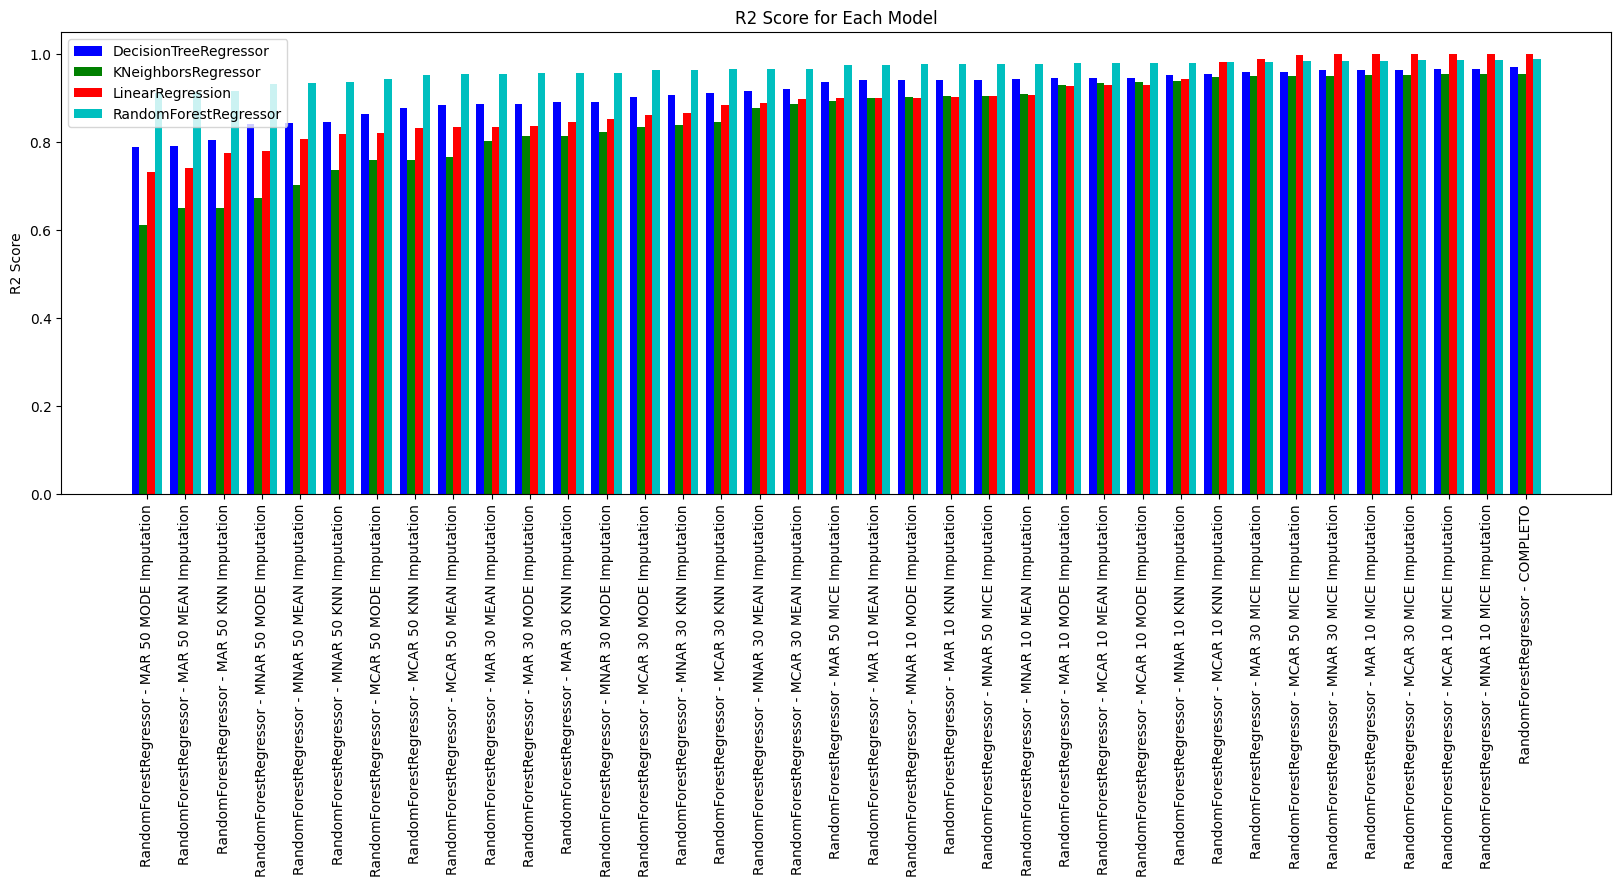

In [25]:
r2_results = {k: v["R2 Score"] for k, v in imputed_results.items()}
r2_results = dict(sorted(r2_results.items(), key=lambda x: x[1]))

models = sorted(list(set([k.split(' - ')[0] for k in r2_results.keys()])))
colors = ['b', 'g', 'r', 'c', 'm']

fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.8 / len(models)
x = np.arange(len(r2_results) // len(models))

for idx, model in enumerate(models):
    model_results = {k: v for k, v in r2_results.items() if k.startswith(model)}
    ax.bar(x + idx * bar_width, list(model_results.values()), width=bar_width, color=colors[idx], label=model)
    x_labels = list(model_results.keys())

plt.xticks(x + (bar_width * (len(models) - 1) / 2), x_labels, rotation=90, fontsize=10)
ax.set_ylabel('R2 Score')
ax.set_title('R2 Score for Each Model')
ax.legend()
plt.show()
